# **1章**

In [ ]:
# 1-0 逆
str = 'stressed'
ans = str[::-1]

print(ans)

desserts


In [ ]:
#1-1 二つ飛ばし
str = 'パタトクカシーー'
ans = str[::2]

print(ans)

パトカー


In [ ]:
#1-2 文字列連結
str1 = 'パトカー'
str2 = 'タクシー'
ans = ''.join([i + j for i, j in zip(str1, str2)]) # "デリミタ".join(list)

print(ans)

パタトクカシーー


In [ ]:
#1-3 単語の長さ
import re
str = 'Now I need a drink, alcoholic of course, after the heavy lectures involving quantum mechanics.'
str = re.sub('[,\.]', '', str)  # ,と.を除去（置き換える対称,　置き換える文字列,　対称文字列）
splits = str.split()  # スペースで区切って単語ごとのリストを作成
ans = [len(i) for i in splits]

print(ans)

[3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9]


In [ ]:
#1-4 先頭一文字または二文字取り出し、先頭から何番目の単語かを表す辞書型配列
str = 'Hi He Lied Because Boron Could Not Oxidize Fluorine. New Nations Might Also Sign Peace Security Clause. Arthur King Can.'
splits = str.split()
one_ch = [1, 5, 6, 7, 8, 9, 15, 16, 19]  # 1文字を取り出す単語の番号リスト
ans = {}
for i, word in enumerate(splits):
  if i + 1 in one_ch:
    ans[word[:1]] = i + 1  # リストにあれば1文字を取得
  else:
    ans[word[:2]] = i + 1  # なければ2文字を取得
    
print(ans)

{'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10, 'Na': 11, 'Mi': 12, 'Al': 13, 'Si': 14, 'P': 15, 'S': 16, 'Cl': 17, 'Ar': 18, 'K': 19, 'Ca': 20}


In [ ]:
# 1-5 n-gram
def ngram(n, lst):
    return list(zip(*[lst[i:] for i in range(n)]))

str = 'I am an NLPer'
words_bi_gram = ngram(2, str.split())
chars_bi_gram = ngram(2, str)

print('単語bi-gram:', words_bi_gram)
print('文字bi-gram:', chars_bi_gram)

単語bi-gram: [('I', 'am'), ('am', 'an'), ('an', 'NLPer')]
文字bi-gram: [('I', ' '), (' ', 'a'), ('a', 'm'), ('m', ' '), (' ', 'a'), ('a', 'n'), ('n', ' '), (' ', 'N'), ('N', 'L'), ('L', 'P'), ('P', 'e'), ('e', 'r')]


In [ ]:
str1 = 'paraparaparadise'
str2 = 'paragraph'
X = set(ngram(2, str1))
Y = set(ngram(2, str2))
union = X | Y
intersection = X & Y
difference = X - Y

print('X:', X)
print('Y:', Y)
print('和集合:', union)
print('積集合:', intersection)
print('差集合:', difference)
print('Xにseが含まれるか:', {('s', 'e')} <= X)
print('Yにseが含まれるか:', {('s', 'e')} <= Y)

X: {('a', 'p'), ('s', 'e'), ('p', 'a'), ('a', 'd'), ('d', 'i'), ('i', 's'), ('a', 'r'), ('r', 'a')}
Y: {('a', 'p'), ('p', 'a'), ('g', 'r'), ('a', 'r'), ('r', 'a'), ('a', 'g'), ('p', 'h')}
和集合: {('a', 'p'), ('s', 'e'), ('p', 'a'), ('a', 'd'), ('d', 'i'), ('g', 'r'), ('i', 's'), ('a', 'r'), ('r', 'a'), ('a', 'g'), ('p', 'h')}
積集合: {('a', 'p'), ('p', 'a'), ('a', 'r'), ('r', 'a')}
差集合: {('s', 'e'), ('i', 's'), ('a', 'd'), ('d', 'i')}
Xにseが含まれるか: True
Yにseが含まれるか: False


In [ ]:
def generate_sentence(x, y, z):
  print(f'{x}時のとき{y}は{z}')

generate_sentence(12, '気温', 22.4)

12時のとき気温は22.4


In [ ]:
def cipher(str):
  rep = [chr(219 - ord(x)) if x.islower() else x for x in str]
  
  return ''.join(rep)

message = 'the quick brown fox jumps over the lazy dog'
message = cipher(message)
print('暗号化:', message)
message = cipher(message)
print('復号化:', message)

暗号化: gsv jfrxp yildm ulc qfnkh levi gsv ozab wlt
復号化: the quick brown fox jumps over the lazy dog


In [ ]:
import random

def shuffle(words):
  result = []
  for word in words.split():
    if len(word) > 4:  # 長さが4超であればシャッフル
      word = word[:1] + ''.join(random.sample(word[1:-1], len(word) - 2)) + word[-1:]
    result.append(word)

  return ' '.join(result)

words = "I couldn't believe that I could actually understand what I was reading : the phenomenal power of the human mind ."
ans = shuffle(words)

print(ans)

I cnud'olt belviee that I cuold aualltcy uendtnsrad what I was raiendg : the pemonhaenl pewor of the hmuan mind .


# **4章**

In [ ]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

In [7]:
!mecab -o ./neko.txt.mecab /content/drive/MyDrive/neko.txt

In [ ]:
!head -15 ./neko.txt.mecab

In [63]:
#4-0 mecabファイルの読み込み
filename = '/content/neko.txt.mecab'

def parse_mecab(block):
    res = []
    for line in block.split('\n'):
        if line == '':
            return res
        (surface, attr) = line.split('\t')
        attr = attr.split(',')
        lineDict = {
            'surface': surface,
            'base': attr[6],
            'pos': attr[0],
            'pos1': attr[1]
        }
        res.append(lineDict)

with open(filename, mode='r') as f:
    blocks = f.read().split('EOS\n')
blocks = list(filter(lambda x: x != '', blocks))
blocks = [parse_mecab(block) for block in blocks]

for block in blocks[5]:
  print(block)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '生れ', 'base': '生れる', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'か', 'base': 'か', 'pos': '助詞', 'pos1': '副助詞／並立助詞／終助詞'}
{'surface': 'とんと', 'base': 'とんと', 'pos': '副詞', 'pos1': '一般'}
{'surface': '見当', 'base': '見当', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': 'が', 'base': 'が', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'つか', 'base': 'つく', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'ぬ', 'base': 'ぬ', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


In [42]:
#4-1 動詞
def extract_surface(block):
    res = list(filter(lambda x: x['pos'] == '動詞', block))
    res = [r['surface'] for r in res]
    return res

ans = set()
ans_list = [extract_surface(block) for block in blocks]

for ai in ans_list:
  for aii in ai:
    ans.add(aii)
print(*ans)


鳴る くばり 折れん 吹き出し 結びつけ 突きつけ 生き 下がろ 打た 学ぶ 泣かし 滅入っ 乞わ 潜り 信じ 飛び降りる 這入れ かくれる 抓ん ぬっ 志す 伺い 言い触らす いただき 掘っ 過ぎ去っ 記さ 口走る 解し 踞る 通り過ぎ いける 動か 踏み込ん 割り込む 迂 作り 考え 数え 使いこなせ 招い 無くなっ 選ん 見出し 鳴り 分から こしらえれ たとえ 苦しん 惹か 責め 避け あろ 帰そ 表し 見透かさ 障ら 浮く 打て 受合え 出逢え 素っ破抜く 作ろ 休む 離さ 引っ張る 禿げ 跳ね返し 飽き 廻す わり 変り 沈み 望ん 生かし でる つかまえ 飲め 動け 憤る 忘れ 凝らし 植え付け 布く ごまかす 解い はなす あらわす 角張っ 曝し 引か 傾く 抛り出さ 投げ込ん 起し 唱う 改める 立て通す 止す 寝かし 仰ぎ うかがう 戻ら 去る つかし 脱ぐ 挿し もぐる 噴き出し 歌っ うっ やむをえ 貰わ あく 縮まる におっ 坐っ 知ろ なさ けりゃ 役に立た 極まっ はいる よし はおり 頂い れろ 馴れ とっ 開け放っ 怒 かくそ 逢っ なろ 潜っ 致さ 占め 食わせろ 終 立っ 坐る 計る 振り翳し 飲ま おけ 係わり 恐れる 為す 引きずり出し 負ける 加え 切ろ 連れ添う とりのけ 見廻 載っ 止め 逢え 振 忍ばし 飾っ 覚える 蒙り 見下ろし 分かれ 抜い くらべ 逃げ込む 聞える 敷き 結い 構っ あたら 下し 化ける 浴びせ はっ しくじっ 結ん 受け取ら 跨い 捕る 雇う 曝さ 擦り切れ ねばり おろし 念じ 受取る 下ら おっしゃい ぶら下げ 見て取る 蹴 掛り 果し 曲る 固まっ やめ 留まり 言う 頑張っ 愛す 構う 有する つくろっ なぐさみ 交ぜ 行こ 応ずる 入り 巡り 張り切れ 終る 引き返し 死に 割り出し 吸い 行き詰る 下る 食わせる 巻く 限ら かねる 通る 逐っ 撲っ 下す 催し 正す 畳ん 行う 数え立て 与え 陣取っ 噛ま 繰返す 待て かぶっ 聞かさ つら 張り上げ 引き寄せる 変え 登り 経っ つくっ 這い やむを得ん 間に合っ 打っ 祝す やって来 刈り込ん 伝え あばか 具え 覚まし もらっ 悩まし 折れる 繰返し すれ 積み かい出す なりすまし 祝し 寄せ つまむ 縺れ られん 鳴

In [47]:
#4-2 動詞の原形
def extract_base(block):
    res = list(filter(lambda x: x['pos'] == '動詞', block))
    res = [r['base'] for r in res]
    return res

ans = set()
ans_list = [extract_base(block) for block in blocks]

for ai in ans_list:
  for aii in ai:
    ans.add(aii)
print(*ans)

鳴る 学ぶ 強いる 奪う 通り掛る 附ける 焦がれる 証拠立てる かれる まつわる 飛び降りる かくれる 志す 言い触らす 曲げる おどす 来す 踞る いける 口走る いらう 表す 割り込む もとめる 遂げる 休む 浮く 引っ繰り返す 素っ破抜く 引き戻す ころばす 引っ張る 廻す みる でる 憤る まかり間違う 布く ごまかす はなす なりすます あらわす 揺れる 思い出せる 焼ける 傾く 唱う 改める 動き出す 立て通す 止す うかがう 去る 脱ぐ 見上ぐ もぐる あく 縮まる 滑らす 納まる はいる 遣わす 画く 歴る 泊る 腐れる 無くなる 坐る 計る 従う ゆるめる つかれる 恐れる 為す 負ける 察する あきれる 連れ添う しかける 投ずる われる 費やす 覚える 代る 倒れる 覆す さえる ふさぐ 逃げ込む 聞える 飼う 寄る そぐ 崇める 化ける 附す 経つ 雇う 捕る 受取る 食み出す さる つむ 見て取る 立ちすくむ 曲る いざる しつける 言う 愛す 構う 有する 応ずる 点じる 復す 凹む 打ち抜く 飽く 試す 受合う 終る そり返る 行き詰る 食わせる 下る とちる 巻く かねる 通る 下す たどる 正す 行う 張付ける 繰返す 延べる 降り込む 引き寄せる 騰る 張りつめる にたてる 錬る 更ける 祝す 嘯く 忍ばす したがう 透す 折れる 剥ぐ かい出す 悩む 平らげる つまむ 鳴く 演ずる 取り寄せる 挙げる 周章てる 飾る 授ける 浮かれる 取り扱う 分つ 笑われる 窮する 染む くらべる 和する たくる 向ける 喰う 持ち出す 犯す 片づける 近付く 制す 弁ずる 信ずる 鍛え上げる 持ち上げる 感じる 禿げる 流れ出す しごく こぼれる られる 起す 開き直る もす はやる 関す はめる 乗り越える 這出る やり過ごす つく 振りかける 慕う 悩ます のむ 諭す 抗する 見計らう 食える 聞かす 差し出す 措く 念じる 試みる 煎じる のろける 覚ます かたまる 納める 誤る あばく 誘う 対す 暮す 聞き惚れる 沈める 膨らます たれる 徹る 割り出す 炊く 浮き出す 重んずる つくろう しなびる あつめる 織る 発す 好む 応える おいたつ わめく 嘆ずる 落ちる 苦しめる 滑り込む せまる くるむ 交ぜる つぶやく つけ込

In [48]:
#4-3 AのB
def extract_a_no_b(block):
    res = []
    for i in range(1, len(block) - 1):
        if block[i - 1]['pos'] == '名詞' and block[i]['base'] == 'の' and block[i + 1]['pos'] == '名詞':
            res.append(block[i - 1]['surface'] + block[i]['surface'] + block[i + 1]['surface'])
    return res

ans = set()
ans_list = [extract_a_no_b(block) for block in blocks]

for ai in ans_list:
  for aii in ai:
    ans.add(aii)
print(*ans)

砲撃の用 下の方 屋の銀 家の御蔭 供の寝床 枚の袋戸 拍手の請求 ここの前 人文の発達 三の取次 詩歌の趣味 胸のあたり シーザーの鼻 僕の近所 参考のため 上の不便 さの二 吉野紙のよう なめくじのソップ 君の妻君 塗の朱 鈴木の君代 掃除の時 鴨のロース 入りの鋏 会社の鉱山 愛の法則 絶対の境 本来の字義 彼の毎夜 事蹟の三 何の択 お正月のよう 彼等の大胆 普通の人間 腹の底 様の妹 ドルの教師 ものの上 江湖の処士 心の願 彼の日記 個の活動 北方の欧 先生のところ 今年の気候 戦争の一 引窓の代理 共の夢 元信の幅 行脚の衲僧 記の続き 煩悶の際 小牛のチャップ もとのところ 奥さんのよう 世人の探偵 主人の恩 主人の随意 運動の何者 中の東郷 大家の所作 自己の思索 迷亭の救い 野良犬の襲撃 酒飲みのよう 明治の秀才 脳天の真中 男女の心持ち 同一の現象 易者のよう 協会の新年 吾の人 襦袢の襟 以外の人間 壺の中 金田の倉 町の下宿 旦那の事 石炭のたき 家庭の風波 鉄の門 西洋の文明 日の日記 喪家の犬 畳の上 方面の研究 国民の歓喜 主人の彩色 坊の太刀 全体の形 寝室の方 珍客の事 虎の話 所の令嬢 一種の贅沢 擂粉木のあと 彼の気焔 物の情け 野暮の極 華族の門前 相思の煙 之の文 臘の哲人 主人の三面 あすこの女房 章の五 通りの次第 取りの妙味 猫の社会 犬の大 大学の貸費 屋の牛鍋 叔父さんのよう 膏のよう 後架の中 家の動静 屋根の瓦 等の寿命 うちの旦那 無言の芝居 鼠賊の逸出 学校の生徒 色の上 相当の時間 主人の先君 条の径路 例の肴 欧州の空気 顔の権衡 一文の価値 迷亭の眼中 何の真似 美妙の音 人間の程度 肝心のところ 館の生徒 子の胃 蒲鉾のよう トチメンボーの復讐 今の糸織 いつの世 今日のところ 坊主の怒り 鼻の在所 任意の庶境 細君の掃除 主人の評判 訳の者 衰弱の一族 シャツのよう 人間の心 吾輩のかく 蛇の骨抜き 糞の凝結 ペンペン草の目標 力学の演者 自分の働き 人の手中 細君の寝顔 こっちの方 梧桐の枝 書生の掌 眼鏡の美学 気候の劇変 逆上の結果 監督の家 心の修業 日本一の堪能 釦の制服 叙述の順序 滑りの難所 人の遣り口 種の逆上 汽車の方 旧暦の歳 屋の酒 魚の事 地面の私有 今の話 天子の前 鰹

In [51]:
#4-4 名刺の連接
def extract_noun_noun(block):
    res = []
    tmp = []
    for b in block:
        if b['pos'] == '名詞':
            tmp.append(b['surface'])
        elif len(tmp) >= 2:
            res.append(''.join(tmp))
            tmp = []
        else:
            tmp = []
    return res

ans = set()
ans_list = [extract_noun_noun(block) for block in blocks]
for ai in ans_list:
  for aii in ai:
    ans.add(aii)
print(*ans)

それ以上 存候 説服 一生徒 私なんざ 原理原則 靴刷毛 裁縫屋 釘付 ょにいるためにはいっしょにいるに充分 間毎月十円 文学美術 通り孔雀一羽 帰宅せん間 鈴がちゃらちゃらと 三歳 蟷螂君 一本 三本 ——三十面 先祖代々 如く御馳走 柳宗元 うた事蹟 大変空腹 大変気 二六時中精細 かたまり 十八世紀 隠居所 みんな七十五日以上経過 おい冗談 万年 事だい 神祇釈教恋無常 約束通り 一日巴理 大分研究 塵積 平生学校 その後今日 ぐる男 聯隊長 鼠狩り 古代希臘 睡眠剤 後架後架 三個 僕一人 個々別々 二三百本 愛嬌もの 何十年 鰹節競争 まま主人 愉快そう 併行線 調戯 元来意地 御台所 二週間 本校建築費中 日本服 一週間 何人 ——何探偵 二日間 マイナス一分刈 ——九時 紋付羽織 月桂寺さん 楽そのもの 自ら筆 平生羅甸語 声盲 通り一厘 大詔煥発 擒ら 人当時有名 何疋来 奔走努力 臥竜窟邸内 末勢 寒月君用心 団栗博士 醸造器 灯明皿 越智東風 不安心 １α２ ため鼻 ホホホホいや 人間一般 席そのもの 先生私 十五畳 硝子窓 二側 ——何 上天気 十二 前後相 八時半頃 働らく 頃吐月峰 十八目 二丁 一瓶四円 膳椀皿小鉢 坊ばさん 偸ん 平げ 平和克復 種取り兼人間研究 延命息災 夏冬 朱盆 質朴剛健 珍野苦沙弥先生虎皮下 胡麻塩色 ダムダム弾以上 普通の 吾縄張内 多角性 けらけら 本色 みんな学校 君の 後架先生 手柄話 図案学校 西洋人風 活動切手 悪もの食い 人間自身 芝居がかり 名産吉備団子 僕等二人 愚猫 練修 毎日学校 ことこと 通町 柔術使 西川さん ハハハハハ不埒 ——そん 舌上 乾燥無味 長寿法 一歳何 邯鄲夢 時姉 入浴致候 ——彼等希臘人 何これ 五六間 消極的修養 御座候 筋頭 ガルガ 全体何 一そう 一ヵ月 ホホホホ多々良さん もの主人 反古紙 二匹 一度目 これぎり ざぶりざぶりと水 英吉利趣味 豁然大悟 四十分 四つ目 一歩 三方面共 自分達 有形無形 二六時中間断 我々仲間 一人 manyaslip'twixtthecupandthelip 顔面的条件 形体以外 建具屋 事六十年前これ 二三分 昔場末 琉球塗 研究上 書生体 一国 十四五 現今英国 ——稿本 乱暴猫 チョン髷頭 これ最大奇蹟 英国バス 教育上必

In [66]:
#4-5 単語の出現頻度
from collections import defaultdict

ans = defaultdict(int)

for block in blocks:
  for b in block:
    if b['pos'] != '記号':
      ans[b['base']] += 1  

ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

for w in ans[:10]:
  print(w)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


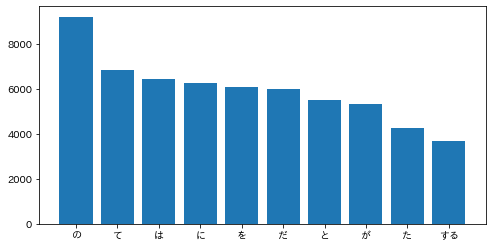

In [76]:
#4-6 ↑の棒グラフ
import matplotlib.pyplot as plt
import japanize_matplotlib

labels = [a[0] for a in ans[:10]]
values = [a[1] for a in ans[:10]]
plt.figure(figsize=(8, 4))
plt.bar(labels, values)
plt.show()